In [1]:
exec(open("inc_notebook.py").read())

current working dirF:\myProjects\tfKeras\UCSC\CMPS242\earthquake


In [2]:
import logging, sys, math,os
exec(open("estimator/initKeras.py").read())


Using TensorFlow backend.


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [6]:
if sys.modules.get( 'library.MultipleBinDataGenerator', False ) != False :
    del sys.modules['library.MultipleBinDataGenerator'] 
if sys.modules.get( 'MultipleBinDataGenerator', False ) != False :
    del sys.modules['MultipleBinDataGenerator'] 
from library.MultipleBinDataGenerator import *

logging.warning( "MultipleBinDataGenerator loaded" )

trainGenerator = MultipleBinDataGenerator(batch_size=16, windowSize = 36, stride = 6)

D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator RobustScaler from version 0.20.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [7]:
aBatch = trainGenerator.__getitem__(0)

In [8]:

if sys.modules.get( 'library.LivePlotKeras', False ) != False :
    del sys.modules['library.LivePlotKeras'] 
if sys.modules.get( 'LivePlotKeras', False ) != False :
    del sys.modules['LivePlotKeras'] 
from library.LivePlotKeras import *

logging.warning( "LivePlotKeras loaded" )

livePlotKeras = LivePlotKeras()

In [9]:
trainGenerator.__len__()

1599

In [10]:
model_input = layers.Input( shape = ( 15 + 6 * 27 + 2 + 15+ 3 * 27,  ) )

In [11]:
x = layers.Dense(64)(model_input)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(32)(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(16)(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(1, activation=activations.relu)(x)

model = models.Model(model_input, x, name = "TinyFFN")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 275)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                17664     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
__________

In [12]:
model.compile(optimizer=optimizers.Adam(lr=0.001),
             loss = losses.MSE,
             metrics = [metrics.MSE, metrics.MAE])

In [13]:
sys.path.remove(str(projectFolder))
os.chdir(currentFolder)

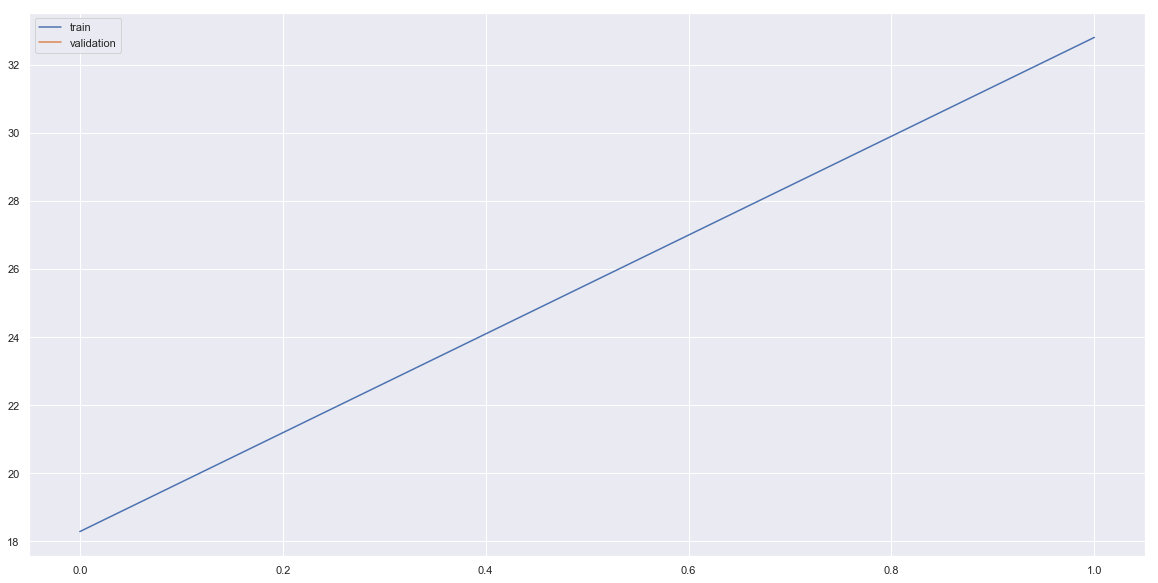

Epoch 4/12
   1/1599 [..............................] - ETA: 7s - loss: 0.3222 - mean_squared_error: 0.3222 - mean_absolute_error: 0.5669

  11/1599 [..............................] - ETA: 8s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan         

  21/1599 [..............................] - ETA: 8s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

  31/1599 [..............................] - ETA: 8s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

  42/1599 [..............................] - ETA: 8s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

  52/1599 [..............................] - ETA: 8s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

  62/1599 [>.............................] - ETA: 7s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

  72/1599 [>.............................] - ETA: 7s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

  82/1599 [>.............................] - ETA: 7s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

  92/1599 [>.............................] - ETA: 7s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 101/1599 [>.............................] - ETA: 7s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 111/1599 [=>............................] - ETA: 7s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 122/1599 [=>............................] - ETA: 7s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 133/1599 [=>............................] - ETA: 7s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 144/1599 [=>............................] - ETA: 7s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 156/1599 [=>............................] - ETA: 7s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 168/1599 [==>...........................] - ETA: 7s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 179/1599 [==>...........................] - ETA: 7s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 190/1599 [==>...........................] - ETA: 7s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 201/1599 [==>...........................] - ETA: 6s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 212/1599 [==>...........................] - ETA: 6s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 224/1599 [===>..........................] - ETA: 6s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 236/1599 [===>..........................] - ETA: 6s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 247/1599 [===>..........................] - ETA: 6s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 258/1599 [===>..........................] - ETA: 6s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 269/1599 [====>.........................] - ETA: 6s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 281/1599 [====>.........................] - ETA: 6s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 293/1599 [====>.........................] - ETA: 6s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 305/1599 [====>.........................] - ETA: 6s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 317/1599 [====>.........................] - ETA: 6s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 329/1599 [=====>........................] - ETA: 6s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 341/1599 [=====>........................] - ETA: 6s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 353/1599 [=====>........................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 365/1599 [=====>........................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 376/1599 [======>.......................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 387/1599 [======>.......................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 398/1599 [======>.......................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 409/1599 [======>.......................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 420/1599 [======>.......................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 431/1599 [=======>......................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 442/1599 [=======>......................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 454/1599 [=======>......................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 466/1599 [=======>......................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 478/1599 [=======>......................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 489/1599 [========>.....................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 500/1599 [========>.....................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 512/1599 [========>.....................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 524/1599 [========>.....................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 536/1599 [=========>....................] - ETA: 5s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 547/1599 [=========>....................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 559/1599 [=========>....................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 571/1599 [=========>....................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 583/1599 [=========>....................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 594/1599 [==========>...................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 605/1599 [==========>...................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 613/1599 [==========>...................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 623/1599 [==========>...................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 633/1599 [==========>...................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 643/1599 [===========>..................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 653/1599 [===========>..................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 664/1599 [===========>..................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 675/1599 [===========>..................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 686/1599 [===========>..................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 698/1599 [============>.................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 708/1599 [============>.................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 719/1599 [============>.................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 730/1599 [============>.................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 741/1599 [============>.................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 752/1599 [=============>................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 762/1599 [=============>................] - ETA: 4s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 773/1599 [=============>................] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 784/1599 [=============>................] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 795/1599 [=============>................] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 806/1599 [==============>...............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 816/1599 [==============>...............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 827/1599 [==============>...............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 838/1599 [==============>...............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 849/1599 [==============>...............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 861/1599 [===============>..............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 873/1599 [===============>..............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 884/1599 [===============>..............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 895/1599 [===============>..............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 907/1599 [================>.............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 918/1599 [================>.............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 930/1599 [================>.............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 941/1599 [================>.............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 952/1599 [================>.............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 963/1599 [=================>............] - ETA: 3s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 974/1599 [=================>............] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 986/1599 [=================>............] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

 997/1599 [=================>............] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1009/1599 [=================>............] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1021/1599 [==================>...........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1032/1599 [==================>...........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1042/1599 [==================>...........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1054/1599 [==================>...........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1065/1599 [==================>...........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1077/1599 [===================>..........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1088/1599 [===================>..........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1099/1599 [===================>..........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1111/1599 [===================>..........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1123/1599 [====================>.........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1132/1599 [====================>.........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1141/1599 [====================>.........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1150/1599 [====================>.........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1159/1599 [====================>.........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1170/1599 [====================>.........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1181/1599 [=====================>........] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1192/1599 [=====================>........] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1203/1599 [=====================>........] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1213/1599 [=====================>........] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1224/1599 [=====================>........] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1234/1599 [======================>.......] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1246/1599 [======================>.......] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1257/1599 [======================>.......] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1267/1599 [======================>.......] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1279/1599 [======================>.......] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1290/1599 [=======================>......] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1302/1599 [=======================>......] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1313/1599 [=======================>......] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1323/1599 [=======================>......] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1334/1599 [========================>.....] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1345/1599 [========================>.....] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1356/1599 [========================>.....] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1367/1599 [========================>.....] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1378/1599 [========================>.....] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1389/1599 [=========================>....] - ETA: 1s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1401/1599 [=========================>....] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1411/1599 [=========================>....] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1422/1599 [=========================>....] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1433/1599 [=========================>....] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1444/1599 [==========================>...] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1454/1599 [==========================>...] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1466/1599 [==========================>...] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1478/1599 [==========================>...] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1490/1599 [==========================>...] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1501/1599 [===========================>..] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1513/1599 [===========================>..] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1525/1599 [===========================>..] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

1536/1599 [===========================>..] - ETA: 0s - loss: nan - mean_squared_error: nan - mean_absolute_error: nan

KeyboardInterrupt: 

In [14]:
np.seterr(invalid='ignore')
np.warnings.filterwarnings('ignore')
history = model.fit_generator( generator=trainGenerator,
                    use_multiprocessing=False, 
                    workers=2, 
                    initial_epoch = 0,
                    epochs=12,
                    max_q_size = 10,
                    steps_per_epoch = trainGenerator.__len__(),
                    callbacks = [livePlotKeras]
                   )

In [ ]:
aBatch = trainGenerator.__getitem__(0)

In [ ]:
os.getcwd()